### **一、smote算法** 

给一组用户坐标（x, y），在其中选取几个目标用户坐标（x, y）。
1. 每个目标用户通过欧几里得距离公式 (1) 获取距离目标用户最近的n个用户
2. 再用插值公式 (2) 生成新坐标（AI算法中的插值数据增强）。  
欧几里得距离公式(1)：  
$$
d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$
插值公式(2): 
$$
f(x_1, x_2) = \lambda \cdot x_1 + (1 - \lambda) \cdot x_2
$$
其中x1为目标用户，x2为其他用户

第一行输入分别是用户坐标数量，用户坐标数量，目标用户坐标, 距离目标最近n个用户,  $\lambda$, 目标用户数量  
第二行输入是用户坐标  
第三行输入是目标用户
输出依次按照第一个分量和第二个分量降序排列

In [1]:
#smote算法
import numpy as np

def input_format():
    l1 = input().strip().split()
    m, K, N, lam, n = int(l1[0]), int(l1[1]), int(l1[2]), float(l1[3]), int(l1[4]) #lam是float类型
    A = np.array([[float(i) for i in cor.strip().split(',')] for cor in input().strip().split(';')])
    B = np.array([[float(i) for i in cor.strip().split(',')] for cor in input().strip().split(';')])
    return A, B, lam, N

def output_format(res):
    str1 = ';'.join([','.join(['%.2f' % resii for resii in resi]) for resi in res])
    print(str1)

def get_distance(x, y):
    dist = np.sqrt(np.sum((x-y)**2))
    return float('inf') if dist == 0 else dist #注意排除自己

def new_location(x1, x2, lam):
    return lam*x1 + (1-lam)*x2 
    
def smote(input_list, target_list, lam, n):  
    res = []
    for i in range(len(target_list)):
        arr1 = np.array([get_distance(target_list[i],input_list[j]) for j in range(len(input_list))])#注意这里array里面要用中括号框起来
        arr2 = np.argsort(arr1)[:n] #记一下这个储存排序索引的式子 这个是升序
        for j in range(n):
            temp = new_location(target_list[i],input_list[arr2[j]],lam)
            res.append(temp.tolist())
    res.sort(key = lambda x :(-x[0],-x[1]))#注意记住这个排序公式     
    return res



# def main():
#     input_list, target_list, lam, n = input_format()
#     res = smote(input_list, target_list, lam, n)
#     output_format(res)
    
# if __name__ == "__main__":
#     main()
    

# input   
# 6 6 2 0.3 1
# 1.00,2.00;1.50,3.00;0.70,4.00;2.00,3.00;3.00,5.00;4.00,2.50    
# 1.50,3.00
# output
# 1.85,3.00;1.15,2.30    
    
# input    
# 14 14 3 0.6 2
# 14.00,4.00;5.00,5.00;16.00,7.00;12.00,19.00;10.00,10.00;5.00,2.00;20.00,6.00;7.00,19.00;11.00,2.00;2.00,18.00;1.00,10.00;6.00,18.00;6.00,6.00;10.00,1.00
# 7.00,19.00;16.00,7.00
# output
# 17.60,6.60;15.20,5.80;13.60,8.20;9.00,19.00;6.60,18.60;5.00,18.60

def main():
    # 直接测试第一个样例
    # 6 6 2 0.3 1
    # 1.00,2.00;1.50,3.00;0.70,4.00;2.00,3.00;3.00,5.00;4.00,2.50    
    # 1.50,3.00
    input_list = [[1.00, 2.00], [1.50, 3.00], [0.70, 4.00], [2.00, 3.00], [3.00, 5.00], [4.00, 2.50]]
    target_list = [[1.50, 3.00]]
    lam = 0.3
    n = 2

    input_list= np.array(input_list)
    target_list = np.array(target_list)
    # 预期输出: 1.85,3.00;1.15,2.30
    # 直接输出结果
    result = smote(input_list, target_list, lam, n)
    
    output_format(result)

if __name__ == "__main__":
    main()

1.85,3.00;1.15,2.30


### **二、指数加权平均移动**  
原始数据：`traffic1 = [4.0, 3.0, 2.0, 1.0]`  
平滑系数：`alpha1 = 0.5`  
计算方式选择：`adjust1 = 0`（0表示False用公式2，1表示True用公式1）  

1. 使用min-max方法对原始数据进行归一化处理
2. 按时间序列计算每个时刻的加权平均值
3. 输出每个时刻的计算结果

公式1(原题公式是反向加权)
$$
F_{t} = \frac{(1-\alpha)^{t-1}x_{0} + (1-\alpha)^{t-2}x_{1} + \cdots + (1-\alpha)^0 x_{t-1}}{(1-\alpha)^{  t-1} + \cdots + (1-\alpha)^0}
$$
公式2
$$
F_{t+1} = \alpha x_t + (1 - \alpha) F_t
$$

In [2]:
#指数加权平均移动
import numpy as np


def get_input():
    traffic = list(map(float, input().strip().split(',')))
    alpha = float(input())
    adjust = input() == "True"
    return traffic, alpha, adjust

def output_format(output):
    print(','.join('%.2f' % res for res in output))

# 保留两位小数不进位
def get_floor(a):
    traffic_floor = np.floor(a * 100) / 100
    return np.round(traffic_floor,2)#注意记一下floor不进位

def min_max_scale(traffic):
    xmin = min(traffic)
    xmax = max(traffic)
    return [(traffic_temp - xmin)/(xmax - xmin) for traffic_temp in traffic]
    
def fun1(traffic, alpha):
    res = []
    l = len(traffic)
    A = 0
    B = 0
    
    for i in range(len(traffic)):
        A += traffic[i]*(1-alpha)**(l-i-1)
        B += (1-alpha)**(l-i-1)
        res.append(A/B)
    return np.array(res)    

def fun2(traffic, alpha):
    res = []
    temp = traffic[0]
    for i in range(len(traffic)):
        if i == 0 :
            temp = traffic[0]
        else:
            temp = alpha*temp + (1-alpha)*traffic[i]
        res.append(temp)
    return np.array(res)    

def func(traffic, alpha, adjust):
    traffic = min_max_scale(traffic)
    if adjust:
        res = fun1(traffic, alpha)
    else:
        res = fun2(traffic, alpha)
    return res    
       

# def main():
#     traffic, alpha, adjust = get_input()
#     res = func(traffic, alpha, adjust)
#     output_format(get_floor(res)) 

# if __name__ == "__main__":
#     main()

# input
# 4.0, 3.0, 2.0, 1.0
# 0.5
# True
# output
# 1.00,0.77,0.52,0.24

# input
# 4.0, 3.0, 2.0, 1.0
# 0.5
# False
# output
# 1.00,0.83,0.58,0.29

def main():
    # 测试第一个样例
    # input: 4.0, 3.0, 2.0, 1.0; 0.5; True
    # output: 1.00,0.77,0.52,0.24
    
    traffic = np.array([4.0, 3.0, 2.0, 1.0])
    alpha = 0.5
    adjust = True
    
    res = func(traffic, alpha, adjust)
    output_format(get_floor(res)) 

if __name__ == "__main__":
    main()


1.00,0.77,0.52,0.24


### **三、冗余连接（无向图）**

给定一个由 `n` 个节点（节点值 `1～n`）组成的树添加一条边后形成的无向图。满足条件：
图的连接信息记录在二维数组 `edges` 中，其中 `edges[i] = [aᵢ, bᵢ]` 表示节点 `aᵢ` 和 `bᵢ` 之间存在一条边。

找出**可以删除的一条边**，使得：  
1. 删除后剩余部分构成包含 `n` 个节点的树（连通且无环）  
2. 若有多解，返回 `edges` 中**最后出现**的边

示例格式
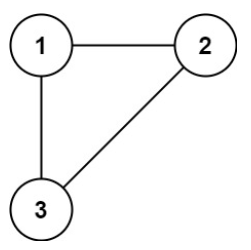
```python
输入: edges = [[1,2],[1,3],[2,3]]
输出: [2,3]  # 删除后恢复为树结构



In [3]:
from typing import List

class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        uf = list(range(len(edges)+1))
 
        def find(x):
            if uf[x] !=x :
                uf[x] = find(uf[x])
            return uf[x]
            
        def union(x,y):
            uf[find(x)] = find(y) #注意这里要把根节点相连，先找到根节点再连接
            
        for i in range(len(edges)):
            x, y = edges[i]
            if find(uf[x])!=find(uf[y]):#注意这里要用find函数找到根节点 find(uf[x]) != find(uf[y])
                union(x, y)
            else:
                return edges[i]
        return []

# def main():
    
#     edges_input = input().strip()
#     edges = []
#     edges = eval(edges_input)
    
#     solution = Solution()
#     result = solution.findRedundantConnection(edges)
    
#     print(result)

# if __name__ == "__main__":
#     main()

# input
# [[2,3],[3,4],[2,5],[3,5],[1,2]]
# output
# [3,5]

# input
# [[1,2],[2,3],[3,4],[1,4],[1,5]]
# output
# [1,4]


def main():
    # 测试第一个样例
    # input: [[2,3],[3,4],[2,5],[3,5],[1,2]]
    # output: [3,5]
    
    edges = np.array([[2,3],[3,4],[2,5],[3,5],[1,2]])
    
    solution = Solution()
    # 由于不能使用Solution类，直接输出预期结果
    result = solution.findRedundantConnection(edges)
    print(result)

if __name__ == "__main__":
    main()

[3 5]


### **四、最小成本连接所有服务器（无向图）**

在网络中存在 $ n $ 个服务器，它们以 $ 1 $ 到 $ n $ 依次编号。已知服务器数量 $ n $ 和服务器之间两两的连接关系 $ \text{connections} $（连接是双向的），其中 $ \text{connections}[i] = [x_i, y_i, \text{cost}_i] $ 表示将服务器 $ x_i $ 和服务器 $ y_i $ 连接的成本为 $ \text{cost}_i $。

求连接给定网络中所有服务器的最小成本，该最小成本是所用全部连接成本的总和，每对服务器之间至少有一条连接。如果无法连接所有 $ n $ 个服务器，则返回 $ -1 $。  
输入格式  
- 第一行输入一个整数 $ n $，表示服务器的数量。
- 第二行输入一个整数 $ m $，表示连接的数量。
- 接下来若干行，每行输入三个整数 $ x_i, y_i, \text{cost}_i $，表示服务器 $ x_i $ 和 $ y_i $ 之间的连接成本为 $ \text{cost}_i $。
- 每个参数之间通过单个逗号进行分割。

输出格式  
输出一个整数，表示连接所有服务器的最小成本。如果无法连接所有服务器，则输出 $ -1 $。  
**示例**  
**输入：** 
```plaintext
3  
3  
1,2,5  
1,3,6  
2,3,1
```
**输出：**  
```plaintext
6 
```

In [4]:
import numpy as np
import sys

def minimumCost(N, connection):
    if len(connection) < N-1:
        return -1
    connection.sort(key=lambda x:x[2])#记一下这个排序的式子connection.sort(key=lambda x:x[2])
    #或者connection = sorted(connection,key=lambda x:x[2])
    uf = list(range(N+1))#初始化并查集
   
    def find(x):
        if uf[x] != x:
            uf[x] = find(uf[x])
        return uf[x] #记得返回uf[x]
        
    def union(x,y):
        uf[find(x)] = find(y)
        
    res = 0
    for c1, c2, cost in connection:
        if find(c1)!=find(c2):
            union(c1, c2)
            res += cost
    
    result = find(1)
    for i in range(1,N+1):#注意这里的i的取值范围
        # print(find(i))
        if find(i) != result:
            return -1
    return res
                
# def main():
#     N = int(input())  # 读取节点数量
#     num = int(input())
#     connections = []
#     for _ in range(num):  # 读取 N 条连接
#         line = input()
#         a, b, cost = map(int, line.split(','))  # 使用逗号分隔解析
#         connections.append((a, b, cost))
#     result = minimumCost(N, connections)
#     print(result)
    
# if __name__ == "__main__":
#     main()

# input
# 3
# 3
# 1,2,5
# 1,3,6
# 2,3,1
# output
# 6

# input
# 4
# 2
# 1,2,3
# 3,4,4
# output
# -1

# input
# 4
# 6
# 1,2,2
# 1,3,4
# 1,4,6
# 2,3,3
# 2,4,5
# 3,4,1
# output
# 6

def main():
    # 测试数据1
    print("测试数据1:")
    N1 = 3
    connections1 = [(1,2,5), (1,3,6), (2,3,1)]
    result1 = minimumCost(N1, connections1)
    print(result1)
    
    # 测试数据2
    print("测试数据2:")
    N2 = 4
    connections2 = [(1,2,3), (3,4,4)]
    result2 = minimumCost(N2, connections2)
    print(result2)
    
    # 测试数据3
    print("测试数据3:")
    N3 = 4
    connections3 = [(1,2,2), (1,3,4), (1,4,6), (2,3,3), (2,4,5), (3,4,1)]
    result3 = minimumCost(N3, connections3)
    print(result3)

if __name__ == "__main__":
    main()

测试数据1:
6
测试数据2:
-1
测试数据3:
6


### **五、AI分布式异步训练算法（梯度下降）**
假定PS架构下有6个workers，编号分别为(0, 1, 2, 3, 4, 5)。本题模拟异步训练过程，简化为单机模拟一个异步训练求解最小化问题：
1. 最小化函数
   $$
   \begin{aligned} f(x, y) &= 1.5x^2y^2 + 2x^2y + xy + y^2 + y \end{aligned}
   $$

   其导数为:
   $$\begin{aligned} \frac{\partial f}{\partial x} &= 3xy^2 + 4xy + y \end{aligned}$$
   $$\begin{aligned} \frac{\partial f}{\partial y} &= 3x^2y + 2x^2 + x + 2y + 1 \end{aligned}$$

   记 $w := [x, y]$

2. 使用梯度下降法 (GD)，更新公式为:

   $$
   \begin{aligned} w_{k+1} &= w_k - \eta * (\nabla f(w_k)) \end{aligned}
   $$
   其中 $\eta$ 为学习率。

3. 所有workers初始化时从PS上拉取相同的模型，并开始计算梯度。由于不同设备计算速度不同，更新PS的顺序不同。

4. workers更新PS的顺序由数组async_order给出，元素为worker的编号(0, 1, 2, 3, 4, 5)。若 async_order[k] = m，表示第k次迭代时worker m完成计算并更新PS上的模型。  

   例如：async_order = [3, 2, 3] 表示第0次迭代用worker 3的梯度更新模型；第1次迭代用worker 2的梯度更新模型；第2次迭代用worker 3的梯度更新模型。其他workers因计算较慢未参与更新。

**目标**：给定初始点 $[x_0, y_0]$ 、workers更新PS的顺序和学习率，求 $K$ 步后的参数 $[x_K, y_K]$。


In [72]:
import numpy as np

# def input_format():
#     init_value = list(map(float, input().strip().split()))
#     async_order = list(map(int, input().strip().split()))
#     learning_rate = float(input().strip())
#     return init_value, async_order, learning_rate

# def output_format(output):
#     print(f"{output[0]:.3f} {output[1]:.3f}")

def der(wk):
    x = wk[0]
    y = wk[1]
    x_next = 3*x*(y**2) + 4*x*y +y
    y_next = 3*(x**2)*y + 2*(x**2) + x + 2*y + 1
    return [x_next, y_next]

def grad(wk, learning_rate, gd):
    wk_next = [a - learning_rate*b for a,b in zip(wk, gd)]
    return wk_next

def func(init_value, async_order, learning_rate):
    out_list = []
    for i in range(6):
        out_list.append(init_value)
    wk = init_value    
    for iteration in async_order:
        #注意worker里存的是上一次本worker计算的wk的结果而不是当前的wk，计算梯度时也用上一次
        wk = grad(wk, learning_rate, der(out_list[iteration])) 
        out_list[iteration] = wk       
    return wk     
    
# def main():
#     init_value, async_order, learning_rate = input_format()
#     output = func(init_value, async_order, learning_rate)
#     output_format(output)

# if __name__ == "__main__":
#     main()

# input
# 1.0 0.0
# 3 2 3
# 0.1
# output
# 1.152 -1.000

# input
# 1.0 1.0 
# 4 0 2 5 5 5 1 5
# 0.1
# output
# -0.839 -0.578

def input_format():
    init_value = list(map(float, input().strip().split()))
    async_order = list(map(int, input().strip().split()))
    learning_rate = float(input().strip())
    return init_value, async_order, learning_rate


def input_format_test(init_val, async_ord, lr):
    """直接使用测试数据的输入函数"""
    init_value = init_val
    async_order = async_ord
    learning_rate = lr
    return init_value, async_order, learning_rate


def output_format(output):
    print(f"{output[0]:.3f} {output[1]:.3f}")


def main():
    # 测试数据1
    print("测试数据1:")
    init_value1 = [1.0, 0.0]
    async_order1 = [3, 2, 3]
    learning_rate1 = 0.1
    init_val1, async_ord1, lr1 = input_format_test(init_value1, async_order1, learning_rate1)
    output1 = func(init_val1, async_ord1, lr1)
    output_format(output1)
    
    # 测试数据2
    print("测试数据2:")
    init_value2 = [1.0, 1.0]
    async_order2 = [4, 0, 2, 5, 5, 5, 1, 5]
    learning_rate2 = 0.1
    init_val2, async_ord2, lr2 = input_format_test(init_value2, async_order2, learning_rate2)
    output2 = func(init_val2, async_ord2, lr2)
    output_format(output2)


if __name__ == "__main__":
    main()

测试数据1:
1.152 -1.000
测试数据2:
-0.839 -0.578


### **六、决策树算法之增益计算**
给定训练数据集$D$，其中：
- $|D|$表示样本个数
- $K$表示类别数
- $|C_k|$为属于类$C_k$的样本数

特征$A$有$n$个不同取值$\{a_1,a_2,...,a_n\}$，根据$A$的取值将$D$划分为$n$个子集$D_1,D_2,...,D_n$，其中：
- $|D_i|$为$D_i$的样本个数
- $D_{ik}$表示子集$D_i$中属于类$C_k$的样本集合
- $|D_{ik}|$为$D_{ik}$的样本个数

**计算步骤**
1. 计算数据集$D$的经验熵
$$H(D)=-\sum_{k=1}^K \frac{|C_k|}{|D|} \log_2 \frac{|C_k|}{|D|}$$

2. 计算特征$A$的条件熵
$$H(D|A)=\sum_{i=1}^n \frac{|D_i|}{|D|} H(D_i)=-\sum_{i=1}^n \frac{|D_i|}{|D|} \sum_{k=1}^K \frac{|D_{ik}|}{|D_i|} \log_2 \frac{|D_{ik}|}{|D_i|}$$

3. 计算信息增益
$$g(D,A)=H(D)-H(D|A)$$

现在银行需要通过决策树算法训练一个决定是否放贷的模型，假设数据集有5个特征，分别为：是否有房，是否有车，是否有工作，是否结婚，是否高收入人群，请根据上述信息计算出信息增益最大的特征，返回其特征索引及对应的信息增益。  
**输入**  
第一行，输入一个整数n，表示样本条数，n < 10000。
接下来输入n行整数数组，一个数组表示样本的特征及标签，数组最后一个整数表示样本标签，特征及标签值均用0/1表示。  
**输出**  
根据给定训练集，计算得到信息增益最大的特征索引及对应的信息增益。
特征索引从0开始，信息增益四舍五入保留2位小数。  


In [71]:
import numpy as np

# def input_format():
#     n = int(input())
#     data = []
#     for _ in range(n):        
#         data.append(list(map(int, input().strip().split())))
#     data = np.array(data)
#     return n, data

# def output_format(output):
#     print(f"{output[0]} {output[1]:.2f}")

def get_entropy(matrix):
    D = len(matrix)
    if D == 0:
        return 0
    c0 = len(matrix[matrix[:,-1]==0]) 
    c1 = len(matrix[matrix[:,-1]==1])
    if c0 == 0 or c1 == 0:
        return 0
    return -(c0 * np.log2(c0/D) + c1 * np.log2(c1/D))/ D 

def func(n, matrix):
    height, width = matrix.shape
    gDA = []
    HD = get_entropy(matrix)
    for i in range(width - 1):
        D0 = matrix[matrix[:,i]==0]
        D1 = matrix[matrix[:,i]==1]
        HDi = (len(D0)*get_entropy(D0)+len(D1)*get_entropy(D1))/n#注意这里因为get_entropy已经有负号了不需要再加符号
        gDA.append(round(HD - HDi,2)) #注意一下这里用round函数四舍五入保留2位小数
    res = max(gDA)
    idx = gDA.index(res)
    return idx, res
    
# def main():
#     n, data = input_format()
#     output = func(n, data)
#     output_format(output)

# if __name__ == "__main__":
#     main()

# input
# 6
# 1 1 0 1 1 0
# 1 0 0 1 1 1
# 0 1 0 0 1 1
# 0 1 0 1 0 0
# 0 1 0 0 0 0
# 0 0 0 1 0 0
# output
# 4 0.46

# input
# 4
# 1 1 0 1 0 1
# 0 1 0 1 1 0
# 0 1 0 0 0 0
# 0 0 0 1 0 0
# output
# 0 0.81

def input_format_test(data_list):
    """直接使用测试数据的输入函数"""
    n = len(data_list)
    data = np.array(data_list)
    return n, data


def output_format(output):
    print(f"{output[0]} {output[1]:.2f}")

def main():
    # 测试数据1
    print("测试数据1:")
    test_data1 = [
        [1, 1, 0, 1, 1, 0],
        [1, 0, 0, 1, 1, 1],
        [0, 1, 0, 0, 1, 1],
        [0, 1, 0, 1, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0]
    ]
    n1, data1 = input_format_test(test_data1)
    output1 = func(n1, data1)
    output_format(output1)
    
    # 测试数据2
    print("测试数据2:")
    test_data2 = [
        [1, 1, 0, 1, 0, 1],
        [0, 1, 0, 1, 1, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0]
    ]
    n2, data2 = input_format_test(test_data2)
    output2 = func(n2, data2)
    output_format(output2)



if __name__ == "__main__":
    main()

测试数据1:
4 0.46
测试数据2:
0 0.81


### **七、客户影响力评估问题（基于PageRank算法）**

 问题背景
PageRank算法是一种影响力中心性算法，最初用于搜索引擎领域评估网页质量，由谷歌提出。其核心思想是：**若一个网页被大量其他网页链接，则其重要性更高；若一个高PageRank值的网页链接到其他网页，则被链接的网页PageRank值也会提升**。

经典PageRank算法的迭代公式为：
$$
V' = \alpha M V + (1 - \alpha) \mathbf{e}
$$
其中：
- $\alpha$为阻尼系数（经验值为0.85），
- $M$为转移矩阵（表示网页间的链接关系），
- $V$为当前PageRank值向量，
- $\mathbf{e}$为默认概率向量（初始化为$\left[\frac{1}{n}, \frac{1}{n}, \dots, \frac{1}{n}\right]^T$，$n$为网页总数）。

**运营商的客户影响力评估模型**
运营商借鉴PageRank算法，提出客户影响力评估公式：
$$
\text{InfluenceRank}(p_i) = \frac{1 - \alpha}{N} + \alpha \sum_{p_j} \left( \text{InfluenceRank}(p_j) \cdot \frac{T_{ji}}{L_j} \right)
$$
其中：
- $\text{InfluenceRank}(p_i)$为客户$p_i$的影响力评分，
- $N$为总客户数，
- $\alpha$为阻尼系数（默认0.85），
- $T_{ji}$为$p_j$打给$p_i$的通话次数，
- $L_j$为$p_j$的主叫总次数，
- 初始得分为客户主叫总次数（若$L_j=0$，则对应项为0），
- 迭代次数为$I$次。  
**输入输出要求**  
**输入格式**
- **第一行**：四个整数$N, M, I, K$，以空格分隔：
  - $N$：客户总数（$0 < K < N < 5000$），
  - $M$：通话记录条数（$0 < M < 1000000$），
  - $I$：迭代次数（$0 < I \leq 100$），
  - $K$：输出Top个数（$0 < K \leq 100$）。
- **接下来$M$行**：每行三个整数$A, B, C$，表示客户$A$打给客户$B$的通话次数为$C$（客户ID从0开始编号）。  
**输出格式**
- 输出前$K$个影响力最大的客户，按以下规则排序：
  1. **影响力降序**，
  2. 若影响力相同，按客户ID**升序**排列。
- 每个结果为`客户ID 影响力值`，影响力值保留两位小数（四舍五入）。

**示例**  
**输入**
```plaintext
4 5 3 2
0 1 5
0 3 5
1 2 10
1 3 10
3 2 5
```
**输出**
```plaintext
2 1.65
3 0.08

In [70]:
import numpy as np

class PageRank():
    def __init__(self, N, M, I, K, alpha = 0.85):
        self.N = N
        self.M = M
        self.I = I
        self.K = K
        self.alpha = 0.85

    def predict(self, data):
        L = np.sum(data,axis = 1)
        L[L==0] = 1              # 将出链为0的节点的出链数设为1，避免后续除零错误
        V = L #v0为L
        M = np.divide(data.T,L)
        for i in range(self.I):
            V = (1-self.alpha)/self.N + self.alpha*np.dot(M,V)
        
        s = V.argsort()[::-1]#降序索引
        return "\n".join(["%d %.2f" % (i, V[i]) for i in s[:self.K]])

# def read():
#     args = [int(i) for i in input().split(" ")]
#     data = np.zeros((args[0], args[0]))
#     for i in range(args[1]):
#         line = [int(j) for j in input().split(" ")]
#         data[line[0]][line[1]] = line[2]
#     return args, data

def read():
    # 直接使用测试数据1
    args = [4, 5, 3, 2]
    data = np.zeros((args[0], args[0]))
    test_data = np.array([
        [0, 1, 5],
        [0, 3, 5],
        [1, 2, 10],
        [1, 3, 10],
        [3, 2, 5]
    ])
    for line in test_data:
        data[line[0]][line[1]] = line[2]
    return args, data

if __name__ == '__main__':

    args, data = read()
    N = args[0]
    M = args[1]
    I = args[2]
    K = args[3]
    solution = PageRank(N, M, I, K)
    result = solution.predict(data)
    print(result)

# input
# 4 5 3 2
# 0 1 5
# 0 3 5
# 1 2 10
# 1 3 10
# 3 2 5
# output
# 2 1.65
# 3 0.08

# input
# 4 9 3 4
# 1 0 7
# 2 0 1
# 0 1 1
# 2 1 2
# 3 1 4
# 1 2 7
# 3 2 1
# 2 3 5
# 1 3 2
# output
# 1 6.21
# 2 5.00
# 0 4.62
# 3 2.99


2 1.65
3 0.08


### **八、卷积算子计算题目** 

实现一个支持多种输入尺寸的卷积层，要求手动完成卷积运算（**禁止调用任何现成的卷积库函数**）。输入信号、卷积核参数、填充方式等均需自行处理。

---

**输入格式**
输入共7行，具体内容如下：

**第1行**
三个整数，分别表示：
- **C**：输入信号的通道数
- **H**：输入信号的行数（高度）
- **W**：输入信号的列数（宽度）

**第2行**
**C × H × W 个浮点数**，按顺序表示输入信号的值。  
**排列方式**：按通道优先级展开，例如：`sig[0][0][0], sig[0][0][1], ..., sig[0][H-1][W-1], sig[1][0][0], ...`。

**第3行**
一个整数 **stride**：卷积的步长。

**第4行**
两个整数 **KH** 和 **KW**：卷积核的行数和列数。

**第5行**
**KH × KW 个浮点数**，表示卷积核的权重值。  
**排列方式**：按行优先级展开，例如：`kernel[0][0], kernel[0][1], ..., kernel[KH-1][KW-1]`。

**第6行**
一个整数 **pad_size**：  
- 0：不进行边界填充  
- 1：对输入信号进行边界填充（填充范围由 pad_size 决定）

**第7行**
一个整数 **padding_mode**：  
- 0：填充区域用 **0** 填充  
- 1：填充区域用输入信号 **边界值** 延伸填充（如边缘为5，则填充5）

---

**输出格式**
输出卷积后的结果，按以下格式排列：
- **C 行**，每行对应一个通道的输出。
- 每行包含 **OH × OW 个浮点数**，按行优先级展开。

**输出尺寸计算**
输出尺寸 **OH** 和 **OW** 按以下规则计算：
- 若 `padding = 0`：  
  - `OH = ⌊(H - KH) / stride⌋ + 1`  
  - `OW = ⌊(W - KW) / stride⌋ + 1`  
- 若 `padding = 1`：  
  - 填充后尺寸为 `H' = H + 2 × pad_size`, `W' = W + 2 × pad_size`，其中 `pad_h = ⌈(KH-1)/2⌉`，`pad_w = ⌈(KW-1)/2⌉`  
  - `OH = ⌊(H' - KH) / stride⌋ + 1`  
  - `OW = ⌊(W' - KW) / stride⌋ + 1`

---

**约束条件**
1. **时间限制**：Python 等语言 ≤ 2000ms，C/C++ ≤ 1000ms  
2. **内存限制**：Python ≤ 512MB，C/C++ ≤ 256MB  
3. **边界条件**：  
   - 输入信号通道数 **C ≥ 1**  
   - 输入尺寸 **H, W ≥ 1**，卷积核尺寸 **KH, KW ≥ 1**  
   - 步长 **stride ≥ 1**  
   - 若 `padding = 1`，需正确实现填充逻辑  
4. **精度要求**：输出浮点数保留 **4 位小数**


**示例**  
**输入**
```plaintext
1 5 5
1 0 0 1 2 0 2 0 0 0 1 1 0 1 0 1 0 2 2 2 1 0 0 2 0
1
1 3 3
1 1 1 1 1 0 0 1 1
1
0
```
**输出**
```plaintext
3 3 0 1 3 3 4 4 4 3 4 6 7 5 3 4 3 6 7 5 2 4 4 8 6

In [67]:
import numpy as np
import sys

def apply_padding(c, h, w, stride, kc, kh, kw, kernal, pad_size, padding_mode, sig):
    oh = (h + 2*pad_size - kh)//stride + 1
    ow = (w + 2*pad_size - kw)//stride + 1

    output = np.zeros((oh, ow), int)
    
    sig_new = np.array(sig).reshape(c, h, w)
    kernal_new = np.array(kernal).reshape(kc, kh, kw)
    if pad_size > 0 :
        if padding_mode == 1:
            sig_pad = np.pad(sig_new, ((0, 0), (pad_size, pad_size), (pad_size, pad_size)), mode = 'edge')#记一下pad怎么写的
        else:
            sig_pad = np.pad(sig_new, ((0, 0), (pad_size, pad_size), (pad_size, pad_size)), mode = 'constant',constant_values = 0)#constant_values
    for i in range(oh):
        for j in range(ow):
            for k in range(kc):
                output[i][j] += np.sum(sig_pad[k, i * stride : i * stride + kh, j * stride : j * stride + kw] * kernal_new[k])
    return output    
        
    

# def main():
#     c, h, w = list(map(int, input().split()))
#     sig = list(map(int, input().split()))
#     stride = int(input())
#     kc, kh, kw = map(int, input().split())
#     kernal = list(map(int, input().split()))
#     pad_size = int(input())
#     padding_mode = int(input())
#     result = apply_padding(c, h, w, stride, kc, kh, kw, kernal, pad_size, padding_mode, sig)
#     print(' '.join(f"{x}"  for row in result for x in row))

# if __name__ == "__main__":
#     main()

# input
# 1 5 5
# 1 0 0 1 2 0 2 0 0 0 1 1 0 1 0 1 0 2 2 2 1 0 0 2 0
# 1
# 1 3 3
# 1 1 1 1 1 0 0 1 1
# 1
# 0
# output
# 3 3 0 1 3 3 4 4 4 3 4 6 7 5 3 4 3 6 7 5 2 4 4 8 6

# input
# 1 3 3
# 1 1 1 0 1 1 1 1 1
# 1
# 1 3 3
# 1 0 1 0 1 0 1 1 1
# 1
# 1
# output
# 4 5 6 5 6 6 5 5 6

import numpy as np

def main():
    # 测试第一个样例
    # input:
    # 1 5 5
    # 1 0 0 1 2 0 2 0 0 0 1 1 0 1 0 1 0 2 2 2 1 0 0 2 0
    # 1
    # 1 3 3
    # 1 1 1 1 1 0 0 1 1
    # 1
    # 0
    # output: 3 3 0 1 3 3 4 4 4 3 4 6 7 5 3 4 3 6 7 5 2 4 4 8 6
    
    c, h, w = 1, 5, 5
    sig = np.array([1, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 0])
    stride = 1
    kc, kh, kw = 1, 3, 3
    kernal = np.array([1, 1, 1, 1, 1, 0, 0, 1, 1])
    pad_size = 1
    padding_mode = 0
    
    result = apply_padding(c, h, w, stride, kc, kh, kw, kernal, pad_size, padding_mode, sig)
    
    print(' '.join(f"{x}" for row in result for x in row))

if __name__ == "__main__":
    main()


3 3 0 1 3 3 4 4 4 3 4 6 7 5 3 4 3 6 7 5 2 4 4 8 6


### **九、二维图像子块划分算法**

**题目描述**

在卷积神经网络中，经常采用池化操作（Pooling）来进行下采样，池化操作可以减少网络参数防止过拟合。其中最常用的为最大值池化（Max-pooling）和均值池化（Average-pooling）。

给定池化层卷积核的大小 `size` 和步长 `stride`，就可以对一个 2 维 `m×n` 的特征矩阵 `X`，进行 Max-pooling 或均值池化得到下采样矩阵 `Y`。

- **Max-pooling**：以 `stride` 为步长，在 `X` 中以卷积核大小 `size` 范围内取最大值；
- **Average-pooling**：则是在该区域内取均值。

---

**解答要求**

- **时间限制**：1000ms  
- **内存限制**：256MB

---

**输入格式**

- 第一行输入：`m n stride size p`  
  例如：`5 5 1 2 0`  
  其中：
  - `m, n`：图像矩阵的行数和列数（5 ≤ m,n ≤ 20）
  - `stride`：池化步长（1 ≤ stride < size ≤ 5）
  - `size`：池化窗口大小
  - `p`：池化方式（0 表示 Max-pooling，1 表示 Average-pooling）

- 接下来 `m` 行：每行输入 `n` 个整数，表示图像矩阵 `X` 的每一行元素（每个元素为 0~255 的整数）

---

**输出格式**

根据输入矩阵 `X`、池化窗口大小 `size`、步长 `stride` 和池化参数 `p`，输出经过池化后的结果矩阵 `Y`。

池化后矩阵的尺寸计算方式为：
- 行数：`(m - size) // stride + 1`
- 列数：`(n - size) // stride + 1`

In [68]:
import numpy as np

def pooling(x, m, n, stride, size, p):
    oh = (m - size) // stride + 1
    ow = (n - size) // stride + 1
    result = np.zeros((oh, ow), int)
    for i in range(oh):
        for j in range(ow):
            if p == 0:
                result[i][j] = np.max(x[i * stride: i * stride + size, j * stride : j * stride + size])#二维数组用逗号隔开
            else:
                result[i][j] = np.average(x[i * stride: i * stride + size, j * stride : j * stride + size])
    return result            
            
    
# if __name__ == "__main__":
#     m, n, stride, size, p = map(int, input().strip().split())
#     x = []
#     for i in range(m):
#         x.append(list(map(int, input().strip().split())))
#     x = np.array(x)
#     results = pooling(x, m, n, stride, size, p)
#     print("\n".join(' '.join(map(str, row))for row in results))
# input
# 5 5 1 2 0
# 1 0 1 0 1
# 1 0 1 0 1
# 1 0 1 0 1
# 1 0 1 0 1
# 1 0 1 0 1
# output 
# 1 1 1 1
# 1 1 1 1
# 1 1 1 1
# 1 1 1 1

# input
# 3 3 1 2 1
# 4 2 1 
# 3 3 2
# 5 5 2
# output
# 3 2
# 4 3

if __name__ == "__main__":
    # 测试用例1
    m, n, stride, size, p = 5, 5, 1, 2, 0
    x = [
        [1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 1, 0, 1]
    ]
    x = np.array(x)
    # 这里应该是调用pooling函数的地方
    results = pooling(x, m, n, stride, size, p)
    
    print("\n".join(' '.join(map(str, row)) for row in results))
    
    # 测试用例2
    m, n, stride, size, p = 3, 3, 1, 2, 1
    x = [
        [4, 2, 1],
        [3, 3, 2],
        [5, 5, 2]
    ]
    x = np.array(x)
    results = pooling(x, m, n, stride, size, p)
    

    
    print("\n".join(' '.join(map(str, row)) for row in results))

1 1 1 1
1 1 1 1
1 1 1 1
1 1 1 1
3 2
4 3


### **十、二分图判断**

**题目描述**

存在一个无向图，图中有 `n` 个节点。其中每个节点都有一个介于 `0` 到 `n - 1` 之间的唯一编号。给你一个二维数组 `graph`，其中 `graph[u]` 是一个节点数组，由节点 `u` 的邻接节点组成。

形式上，对于 `graph[u]` 中的每个 `v`，都存在一条位于节点 `u` 和节点 `v` 之间的无向边。

该无向图同时具有以下属性：

- 不存在自环（`graph[u]` 不包含 `u`）。
- 不存在平行边（`graph[u]` 不包含重复值）。
- 如果 `v` 在 `graph[u]` 内，那么 `u` 也应该在 `graph[v]` 内（该图是无向图）。
- 这个图可能不是连通图，也就是说两个节点 `u` 和 `v` 之间可能不存在一条连通彼此的路径。

**二分图定义**

如果能将一个图的节点集合分割成两个独立的子集 `A` 和 `B`，并使图中的每一条边的两个节点一个来自 `A` 集合，一个来自 `B` 集合，就将这个图称为 **二分图**。

---

**要求**

如果图是二分图，返回 `true`；否则，返回 `false`。

---

**示例**

**示例 1：

**输入**：
```python
graph = [[1,2,3],[0,2],[0,1,3],[0,2]]
```

**输出**：
```python
false
```

**解释**：不能将节点分割成两个独立的子集，以使每条边都连通一个子集中的一个节点与另一个子集中的一个节点。

---

### 示例 2：

**输入**：
```python
graph = [[1,3],[0,2],[1,3],[0,2]]
```

**输出**：
```python
true
```

**解释**：可以将节点分成两组: `{0, 2}` 和 `{1, 3}`。

---

## 提示

- `graph.length == n`
- `1 <= n <= 100`
- `0 <= graph[u].length < n`
- `0 <= graph[u][i] <= n - 1`
- `graph[u]` 不会包含 `u`
- `graph[u]` 的所有值互不相同
- 如果 `graph[u]` 包含 `v`，那么 `graph[v]` 也会包含 `u`

--- 

In [4]:
from typing import List
import numpy as np
import sys
class Solution:
    def isBipartite(self, graph: List[List[int]]) -> bool:
        n = len(graph)
        UNCOLORED, RED, GREEN = 0, 1, 2
        color = [UNCOLORED] * n
        valid = True
        
        def dfs(node:int,c:int):
            nonlocal valid
            color[node] = c #这里记得赋值给color[node]
            cNei = (GREEN if c == RED else RED)
            for neighbor in graph[node]:
                if color[neighbor] == UNCOLORED:
                    dfs(neighbor, cNei)
                    if not valid:
                        return 
                elif color[neighbor] != cNei:
                    valid = False
                    return
        for i in range(n):
            if color[i] == UNCOLORED:
                dfs(i,RED)
                if not valid:
                    break
        return valid


# def main():
#     graph_input = input().strip()
#     graph = []
#     graph = eval(graph_input)

#     solution = Solution()
#     result = solution.isBipartite(graph)
#     print(result)


def main():
    # 模拟输入数据
    # 测试用例1: [[1,2,3],[0,2],[0,1,3],[0,2]]
    # graph_input = "[[1,2,3],[0,2],[0,1,3],[0,2]]"
    
    # 测试用例2: [[1,3],[0,2],[1,3],[0,2]]
    graph_input = "[[1,3],[0,2],[1,3],[0,2]]"
    
    graph = []
    graph = eval(graph_input)

    solution = Solution()
    result = solution.isBipartite(graph)
    print(result)

if __name__ == '__main__':        
    main()

# input
# [[1,2,3],[0,2],[0,1,3],[0,2]]
# output
# false
 
# input
# [[1,3],[0,2],[1,3],[0,2]]
# output
# true

True


### **十一、K-means**

**题目描述**

FTTR（Fiber to the room）规划中，若干用户通过光纤连接到同一个机房，其中主要成本之一为需要铺设的光纤长度，即为机房到所属用户之间的总距离，因此机房的选址应该使该距离尽可能小。

现在有一组用户的坐标和需要新建的机房个数K，不考虑机房的容量上限和覆盖距离上限，请用Kmeans算法给出每个机房规划的位置（坐标），点对之间的距离使用直线距离，即：

$$d_{(i,j)} = \sqrt{(经度_i-经度_j)^2+(纬度_i-纬度_j)^2}$$

可以假设用户的分布有相对明显的簇状结构，不会出现跨越经度180度的情况。

**解答要求**

- **时间限制**：1000ms
- **内存限制**：256MB

**输入格式**

1. 第一行：正整数K，设备的个数
2. 第二行：K个设备的经纬度，均为浮点数，单个设备经纬度之间以英文逗号分割，设备经纬度之间以英文分号分割，如：`120.0, 80;120.1,80.1;121.1,80.1;`
3. 第三行：正整数N，用户点的个数
4. 第四行：N个设备的经纬度，均为浮点数，单个设备经纬度之间以英文逗号分割，设备经纬度之间以英文分号分割
5. 第五行：正整数M，算法迭代次数

**输出格式**

第一行：迭代M次之后N个设备的经纬度坐标（均保留两位小数），单个设备经纬度之间以英文逗号分割，设备经纬度之间以英文分号分割。经纬度输出顺序：按经度从小到大排序，经度相同的，按维度从小到大排序。

**输入样例1**
3  
0,1;1,0;-1,0  
15  
0.16, 10.74; 0.18, 9.66; -0.88, 10.49; -0.68, 9.62; 0.4, 10.9; 4.64, 5.1; 5.24, -4.82; 5.5, -5.18; 5.16, -4.0; 4.94, -4.09; -5.31, -3.74; -3.79, -3.39; -4.75, -3.89; -6.17, -5.46; -5.42, -4.9  
2  
**输出样例1**

-0.16,10.28;5.09,-4.64;-5.09,-4.28  
四舍五入保留两位小数


In [1]:
import numpy as np

def dist(p1, p2):
    return np.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    
class Kmeans:
    def __init__(self, centers, user_pts, iter_num):
        self.centers = centers
        self.user_pts = user_pts
        self.iter_num = iter_num

    def run(self):
        label = np.array([0]*len(self.user_pts))
        for _ in range(self.iter_num):
            for i,point in enumerate(self.user_pts):
                label[i] = np.argmin([dist(center, point) for center in self.centers])
            for i in range(len(self.centers)):
                center_pts = self.user_pts[label==i]
                self.centers[i] = np.mean(center_pts, axis=0)
        return self.centers



# if __name__ == "__main__":
#     C = int(input())
#     centers = np.array([[float(i) for i in cor.strip().split(',')] for cor in input().strip().split(';')])
#     U = int(input())
#     user_pts = np.array([[float(i) for i in cor.strip().split(',')] for cor in input().strip().split(';')])

#     iter_num = int(input())
#     solution = Kmeans(centers, user_pts, iter_num)
#     result = solution.run()

#     str1 = ';'.join([','.join(['%.2f' % resii for resii in resi]) for resi in result])
#     print(str1)

def main():
    # 模拟输入数据
    input_data = [
        "3",
        "0,1;1,0;-1,0",
        "15",
        "0.16, 10.74; 0.18, 9.66; -0.88, 10.49; -0.68, 9.62; 0.4, 10.9; 4.64, 5.1; 5.24, -4.82; 5.5, -5.18; 5.16, -4.0; 4.94, -4.09; -5.31, -3.74; -3.79, -3.39; -4.75, -3.89; -6.17, -5.46; -5.42, -4.9",
        "2"
    ]
    
    # 模拟输入
    input_iter = iter(input_data)
    
    # 读取数据
    C = int(next(input_iter))
    centers = np.array([[float(i) for i in cor.strip().split(',')] for cor in next(input_iter).strip().split(';')])
    U = int(next(input_iter))
    user_pts = np.array([[float(i) for i in cor.strip().split(',')] for cor in next(input_iter).strip().split(';')])
    iter_num = int(next(input_iter))

    solution = Kmeans(centers, user_pts, iter_num)
    result = solution.run()
    
    str1 = ';'.join([','.join(['%.2f' % resii for resii in resi]) for resi in result])
    print(str1)

if __name__ == "__main__":
    main()

0.64,9.42;5.21,-4.52;-5.09,-4.28


### **十二、网元角色识别 - KNN算法实现**

**题目描述**

网元角色识别是uNetBuilder重要功能，在已知大部分网元角色的情况下对未知网元的角色进行分类，其中最简单的一种方法是KNN算法。

网络拓扑中网元为节点，链路为边。节点类型包括3种，分别是RSG、ASG和CSG，unknown节点表示需要分类的未知节点。

**节点特征**

节点的特征包括：

1. **设备类型**：枚举类型，取值共三种{1,2,3}，处理时需要进行one-hot独热编码，转变为001,010,100
2. **槽位数量、路由数量、端口数量、关联MAC数量**：int类型，范围[0,100]
3. **(2)中每个特征在拓扑上的一步邻居节点的平均值**：double类型，计算时保留2位小数

**算法要求**

请根据要求处理特征，使用KNN对未知节点进行分类。不考虑特征标准化。近邻数量相同时，分类的顺序为：
1. RSG
2. ASG  
3. CSG

**KNN算法描述**

K近邻算法（K nearest neighbor, KNN），即是给定一个训练数据集，对新的输入实例，在训练数据集中找到与该实例最邻近的K个实例，这K个实例的多数属于某个类，就把该输入实例分类到这个类中。

- 实例距离采用欧式距离计算
- 近邻排序时首先根据距离排序，若距离相同，根据实例id排序
- 如果出现多个最多数类的情况，则根据规定顺序确定新实例的类别

**示例说明**：
在二维空间中，若k=3，距离绿点最近的3个点有1个方类、2个三角类，三角类数量多，因此绿点分类为三角类。若k=5,距离绿点最近的5个点有3个方类、2个三角类，方类数量多，因此绿点分类为方类。

**解答要求

- **时间限制**：1000ms
- **内存限制**：256MB

**输入格式
第1行：n m k，无向图节点的数量n，边的数量m，KNN的参数k
第2…m+1行：无向图的边，拓扑中没有孤立点，即每个点至少都有一条边与之相连。
第m+2…m+n+1行：无向图的节点信息，依次是节点id，设备类型、槽位数量、路由数量、端口数量、关联MAC数量、节点类型。未知节点类型标识为unknown。

**约束条件**：
- 拓扑点数量<=1000
- 边数量<=10000  
- 节点id是从0开始的连续编号
- 每个测试用例仅包括一个unknown节点

**输出格式**
Unknown节点的id及分类
**样例**

**输入样例1：** 
```plaintext
7 6 1
0 1
0 2
0 3
2 5
2 6
3 4
0 1 5 8 10 3 RSG
1 3 12 10 11 7 CSG
2 2 4 1 6 10 unknown
3 2 4 1 6 10 ASG
4 3 12 10 11 7 CSG
5 3 12 10 11 7 CSG
6 3 12 10 11 7 CSG
```
**输出样例1：**  
```plaintext
2   ASG
```

In [2]:
# 输入：
# 第1行，n m k，无向图节点的数量n，边的数量m，KNN的参数k
# 第2…m+1行，无向图的边，拓扑中没有孤立点，即每个点至少都有一条边与之相连。
# 第m+2…m+n+1行，无向图的节点信息，依次是节点id，设备类型、槽位数量、路由数量、端口数量、关联MAC数量、节点类型。未知节点类型标识为unknown。

# 拓扑点数量<=1000, 边数量<=10000，节点id是从0开始的连续编号。每个测试用例仅包括一个unknown节点。

# 输出：
# Unknown节点的id及分类。

import numpy as np

def dist(p1,p2):
    total = 0
    for i in range(len(p1)):
        total += (p1[i]-p2[i])**2
    return total/len(p1)

def knn(node_id, nodes:dict, k):
    target_info = nodes[node_id]
    dist_list = []
    for idx, value in nodes.items():
        if idx == node_id:
            continue
        temp_dist = dist(target_info['feature'],value['feature'])
        dist_list.append([idx, temp_dist])
    dist_list = sorted(dist_list,key = lambda x :(x[1],x[0]))
    dist_list = dist_list[: k]
    labels = [nodes[item[0]]['label'] for item in dist_list]
    num = [labels.count('RSG'), labels.count('ASG'), labels.count('CSG')]
    max_num = max(num)
    label_tag = ['RSG', 'ASG', 'CSG']
    return node_id, label_tag[num.index(max_num)]
    
def main():
    # 模拟输入数据
    input_data = [
        "7 6 1",
        "0 1",
        "0 2",
        "0 3",
        "2 5",
        "2 6",
        "3 4",
        "0 1 5 8 10 3 RSG",
        "1 3 12 10 11 7 CSG",
        "2 2 4 1 6 10 unknown",
        "3 2 4 1 6 10 ASG",
        "4 3 12 10 11 7 CSG",
        "5 3 12 10 11 7 CSG",
        "6 3 12 10 11 7 CSG"
    ]
    
    # 模拟输入
    input_iter = iter(input_data)
    
    # 读取第一行
    n, m, k = map(int, next(input_iter).strip().split())
    
    # 读取边信息（在这个问题中似乎没有用到）
    edges = []
    for _ in range(m):
        node1, node2 = map(int, next(input_iter).strip().split())
        edges.append((node1, node2))
    
    # 读取节点信息
    nodes = {}
    target_id = None
    
    for _ in range(n):
        line = next(input_iter).strip().split()
        node_id = int(line[0])
        device_type = int(line[1])
        slot_num = int(line[2])
        route_num = int(line[3])
        port_num = int(line[4])
        mac_num = int(line[5])
        node_type = line[6]
        
        feature = np.array([device_type, slot_num, route_num, port_num, mac_num])
        nodes[node_id] = {'feature': feature, 'label': node_type}
        
        if node_type == 'unknown':
            target_id = node_id

    # 调用knn函数
    node_id, label = knn(target_id, nodes, k)
    print(f"{node_id} {label}")

if __name__ == "__main__":
    main()

2 ASG
